# FINAL TEAM PROJECT

## Team members
- Sai Ram Ajay Krishna Gabbula
- Venkata Vijay Krishna Gabbula
- Pratik Bhatt

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
# Total population, N.
N = 1000
# Initial number of infected and recovered individuals.
I0= 10
R0= 0
# Initial susceptability
S0 = N - I0 - R0

In [3]:
alpha=0.005
beta=0.1
gamma=5/2000 # infectious for 5 rounds out of 2000

## SIR Model

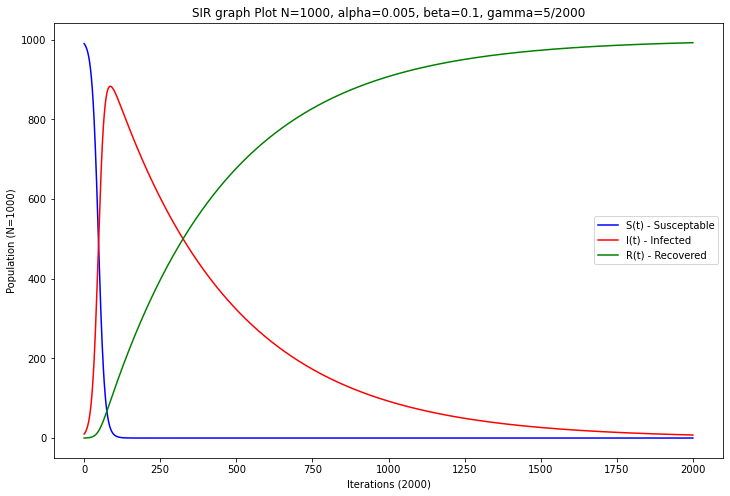

In [4]:
t = np.linspace(0, 2000, 2000)

def sir(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(sir, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

plt.figure(figsize = (12, 8))
plt.plot(t, S, 'b', label='S(t) - Susceptable')
plt.plot(t, I, 'r', label='I(t) - Infected')
plt.plot(t, R, 'g', label='R(t) - Recovered')
plt.title('SIR graph Plot N=1000, alpha=0.005, beta=0.1, gamma=5/2000')
plt.xlabel('Iterations (2000)')
plt.ylabel('Population (N=1000)')
plt.legend()
plt.show()

- For SIR model R0 can be calculated as **β/ν= R0** 

In [5]:
r0=beta/gamma
r0

40.0

- R0 obtained is 8.
- So on an average a person who is infected will pass the infection to 8 other people.
- So the epidemic doesn't die out and infects all the population.

## SIRS Model

In [6]:
# Total population, N.
N = 1000
# Initial number of infected and recovered individuals.
I0= 10
R0= 0
# Initial susceptability
S0 = N - I0 - R0

In [7]:
alpha=0.005
beta=0.006
gamma=5/2000 # infectious for 5 rounds out of 2000
lamda=20/2000 # Reinfect after 20 rounds

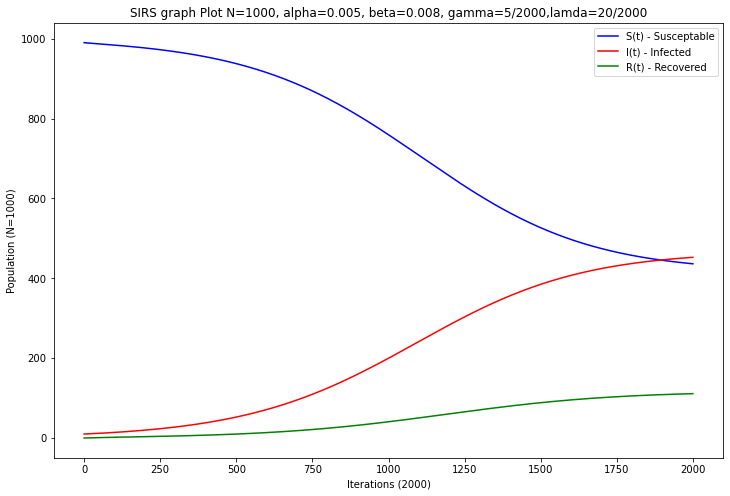

In [8]:
def sirs(y, t, N, beta, gamma, lamda):
    S, I, R = y
    dSdt = lamda*R -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I - lamda*R
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(sirs, y0, t, args=(N, beta, gamma, lamda))
S, I, R = ret.T

plt.figure(figsize = (12, 8))
plt.plot(t, S, 'b', label='S(t) - Susceptable')
plt.plot(t, I, 'r', label='I(t) - Infected')
plt.plot(t, R, 'g', label='R(t) - Recovered')
plt.title('SIRS graph Plot N=1000, alpha=0.005, beta=0.008, gamma=5/2000,lamda=20/2000')
plt.xlabel('Iterations (2000)')
plt.ylabel('Population (N=1000)')
plt.legend()
plt.show()

### Calculating the change in recovered individuals for each iteration

In [9]:
print(R)

[0.00000000e+00 2.49307609e-02 4.96992304e-02 ... 1.11094049e+02
 1.11114224e+02 1.11134332e+02]


In [10]:
diff=[]
for i in range(len(R)-1):
    result=R[i+1]-R[i]
    diff.append(result)
print(diff)

[0.024930760931053102, 0.024768469447445454, 0.024608158932410036, 0.02444969926520317, 0.024293107826498794, 0.024138365836140596, 0.023985455502228942, 0.02383435936869563, 0.023685060715113754, 0.02353754073017389, 0.023391785096169543, 0.023247776340753923, 0.0231054980126727, 0.022964933895446293, 0.022826067862952992, 0.022688884770785067, 0.02255336816696263, 0.02241950202272225, 0.022287270671856707, 0.022156658633270154, 0.022027650610978555, 0.02190023198097324, 0.021774388971408265, 0.021650106321256746, 0.021527369667408647, 0.021406164892852964, 0.021286478085525307, 0.021168295526751257, 0.021051601247218055, 0.02093638091645411, 0.02082262217836961, 0.020710311567533113, 0.020599435775675246, 0.020489981651687472, 0.02038193609982175, 0.020275285214266026, 0.020170016501650845, 0.020066117447657517, 0.019963575490976493, 0.019862378211675802, 0.01976251333120338, 0.019663968511641317, 0.019566731207679045, 0.01947078980076311, 0.019376132496058407, 0.01928274760637838, 0

### Calculating the change in infected individuals for each iteration

In [11]:
print(I)

[ 10.          10.03447472  10.06906469 ... 452.45571676 452.50935364
 452.56279671]


In [12]:
change=[]
for i in range(len(I)-1):
    result1=I[i+1]-I[i]
    change.append(result1)
print(change)

[0.034474717493589324, 0.03458996992534402, 0.034705612674976294, 0.03482162550420753, 0.034938016169860475, 0.03505478539630147, 0.03517193427368959, 0.03528946387373111, 0.035407375256029994, 0.03552566959971237, 0.03564434784431825, 0.03576341111546277, 0.03588286049942546, 0.03600269708193515, 0.03612292195005473, 0.036243536205565974, 0.03636454093063435, 0.036485937213679875, 0.036607726148496056, 0.0367299088315729, 0.03685248636209515, 0.0369754598505061, 0.03709883042165529, 0.037222599173695414, 0.03734676722000607, 0.037471335677722095, 0.03759630566704075, 0.03772167831106543, 0.03784745470697537, 0.03797363597191428, 0.038100223246956944, 0.03822721766072412, 0.038354620344312806, 0.038482432431308666, 0.0386106550570382, 0.03873928935217563, 0.038868336459138675, 0.03899779752151211, 0.03912767368386483, 0.03925796609313359, 0.039388675898624825, 0.03951980425150303, 0.039651352304415965, 0.039783321214377665, 0.039915712139960036, 0.04004852624201938, 0.04018176468375856

In [13]:
mean=sum(change)/len(change)
mean

0.22139209439983273

In [14]:
r0_1=beta/gamma
r0_1

2.4

- R0 obtained is 3.2.
- So on an average a person who is infected will pass the infection to 3 other people.
- So the epidemic doesn't die out and infects all the population.

### SIR model

In [15]:
start_time = 0
end_time = 2000
dt = 1

def model_s(beta,s,i):
    return -beta*s*i

def model_i(beta,s,i,alpha):
    return beta*s*i - alpha*i

def model_r(alpha,i):
    return alpha*i

n = int((end_time - start_time) / dt )
S = np.zeros(n)
I = np.zeros(n)
R = np.zeros(n)
I[0] = 5
R[0] = 0
S[0] = 995
beta = 0.0001
alpha = 0.005
N = S[0] + R[0] + I[0]
total = np.zeros(n)
total[0] = N
for i in range(1,len(S)):
    S[i] = S[i-1] + model_s(beta,S[i-1],I[i-1]) * dt
    I[i] = I[i-1] + model_i(beta,S[i-1],I[i-1],alpha) * dt
    R[i] = R[i-1] + model_r(alpha,I[i-1]) * dt
    total[i] = R[i] + S[i] + I[i]

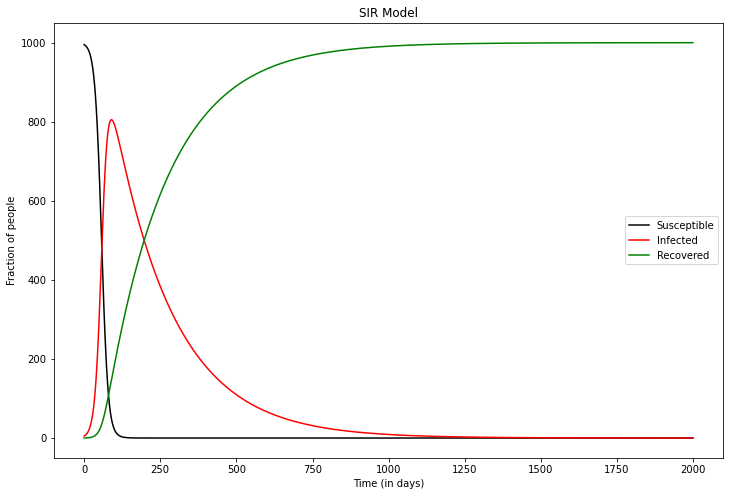

In [16]:
plt.figure(figsize = (12, 8))
plt.plot(np.arange(start_time,end_time,dt),S,color='black',label='Susceptible')
plt.plot(np.arange(start_time,end_time,dt),I,color='red',label='Infected')
plt.plot(np.arange(start_time,end_time,dt),R,color='green',label='Recovered')

plt.legend()
plt.xlabel('Time (in days)')
plt.ylabel('Fraction of people')
plt.title('SIR Model')
plt.show()

## SIRS model

In [17]:
start_time = 0
end_time = 2000
dt = 1

def model_s(beta,s,i,lamda,r):
    return lamda*r-beta*s*i

def model_i(beta,s,i,alpha):
    return beta*s*i - alpha*i

def model_r(alpha,i,lamda,r):
    return alpha*i-lamda*r

n = int((end_time - start_time) / dt )
S = np.zeros(n)
I = np.zeros(n)
R = np.zeros(n)
I[0] = 5
R[0] = 0
S[0] = 995
beta = 0.0001
alpha = 0.0025
lamda=0.001
N = S[0] + R[0] + I[0]
total = np.zeros(n)
total[0] = N
for i in range(1,len(S)):
    S[i] = S[i-1] + model_s(beta,S[i-1],I[i-1],lamda,R[i-1]) * dt
    I[i] = I[i-1] + model_i(beta,S[i-1],I[i-1],alpha) * dt
    R[i] = R[i-1] + model_r(alpha,I[i-1],lamda,R[i-1]) * dt
    total[i] = R[i] + S[i] + I[i]

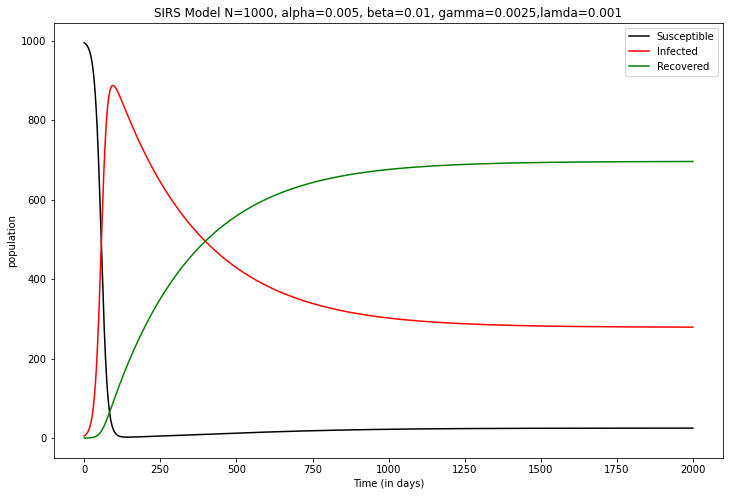

In [18]:
plt.figure(figsize = (12, 8))
plt.plot(np.arange(start_time,end_time,dt),S,color='black',label='Susceptible')
plt.plot(np.arange(start_time,end_time,dt),I,color='red',label='Infected')
plt.plot(np.arange(start_time,end_time,dt),R,color='green',label='Recovered')

plt.legend()
plt.xlabel('Time (in days)')
plt.ylabel('population')
plt.title('SIRS Model N=1000, alpha=0.005, beta=0.01, gamma=0.0025,lamda=0.001')
plt.show()

### Section 2: B
- vacine introduced at t3.
- let protection rate (efficacy) theta be 0.8.
- Taking vaccination rates as 40% and 50% i.e., 0.4 and 0.5.

### For 50% vaccinations after t3

In [19]:
start_time = 0
end_time = 2000
dt = 1

def model_s(beta,s,i,lamda,r):
    return lamda*r-beta*s*i

def model_i(beta,s,i,alpha):
    return beta*s*i - alpha*i

def model_r(alpha,i,lamda,r):
    return alpha*i-lamda*r

n = int((end_time - start_time) / dt)
S = np.zeros(n)
I = np.zeros(n)
R = np.zeros(n)
V = np.zeros(n)

beta = 0.0001
alpha = 0.005
lamda=0.01
theta=0.8    # vaccine protection rate

N = S[0] + R[0] + I[0] + V[0]
total = np.zeros(n)
total[0] = N
I[0] = 5
R[0] = 0
S[0] = 995

for i in range(1,3):
    S[i] = S[i-1] + model_s(beta,S[i-1],I[i-1],lamda,R[i-1]) * dt
    I[i] = I[i-1] + model_i(beta,S[i-1],I[i-1],alpha) * dt
    R[i] = R[i-1] + model_r(alpha,I[i-1],lamda,R[i-1]) * dt

V[0] = 500*theta

I[3] = I[2]
R[3] = R[2]
S[3] = 1000-V[0]-I[3]

for i in range(4,len(S)):
    S[i] = S[i-1] + model_s(beta,S[i-1],I[i-1],lamda,R[i-1]) * dt
    I[i] = I[i-1] + model_i(beta,S[i-1],I[i-1],alpha) * dt
    R[i] = R[i-1] + model_r(alpha,I[i-1],lamda,R[i-1]) * dt
    V[i] = V[0]

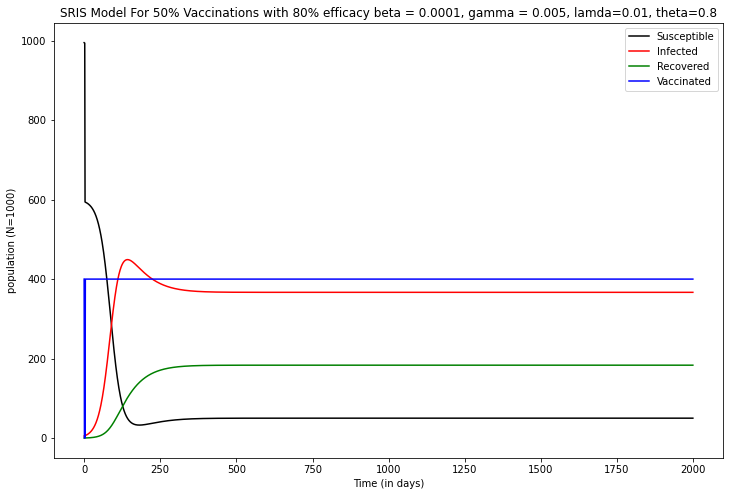

In [20]:
plt.figure(figsize = (12, 8))
plt.plot(np.arange(start_time,end_time,dt),S,color='black',label='Susceptible')
plt.plot(np.arange(start_time,end_time,dt),I,color='red',label='Infected')
plt.plot(np.arange(start_time,end_time,dt),R,color='green',label='Recovered')
plt.plot(np.arange(start_time,end_time,dt),V,color='blue',label='Vaccinated')


plt.legend()
plt.xlabel('Time (in days)')
plt.ylabel('population (N=1000)')
plt.title('SRIS Model For 50% Vaccinations with 80% efficacy beta = 0.0001, gamma = 0.005, lamda=0.01, theta=0.8')
plt.show()

### For 40% vaccinations after t3

In [21]:
start_time = 0
end_time = 2000
dt = 1

def model_s(beta,s,i,lamda,r):
    return lamda*r-beta*s*i

def model_i(beta,s,i,alpha):
    return beta*s*i - alpha*i

def model_r(alpha,i,lamda,r):
    return alpha*i-lamda*r

n = int((end_time - start_time) / dt)
S = np.zeros(n)
I = np.zeros(n)
R = np.zeros(n)
V = np.zeros(n)

beta = 0.0001
alpha = 0.005
lamda=0.01
theta=0.8    # vaccine protection rate

N = S[0] + R[0] + I[0] + V[0]
total = np.zeros(n)
total[0] = N
I[0] = 5
R[0] = 0
S[0] = 995


for i in range(1,3):
    S[i] = S[i-1] + model_s(beta,S[i-1],I[i-1],lamda,R[i-1]) * dt
    I[i] = I[i-1] + model_i(beta,S[i-1],I[i-1],alpha) * dt
    R[i] = R[i-1] + model_r(alpha,I[i-1],lamda,R[i-1]) * dt

V[3] = 400*theta

I[3] = I[2]
R[3] = R[2]
S[3] = 1000-V[3]-I[3]
# print('I at 3 :',I[3])
# print('R at 3 :',R[3])
# print('S at 3 :',S[3])

for i in range(4,len(S)):
    S[i] = S[i-1] + model_s(beta,S[i-1],I[i-1],lamda,R[i-1]) * dt
    I[i] = I[i-1] + model_i(beta,S[i-1],I[i-1],alpha) * dt
    R[i] = R[i-1] + model_r(alpha,I[i-1],lamda,R[i-1]) * dt
    V[i] = V[3]

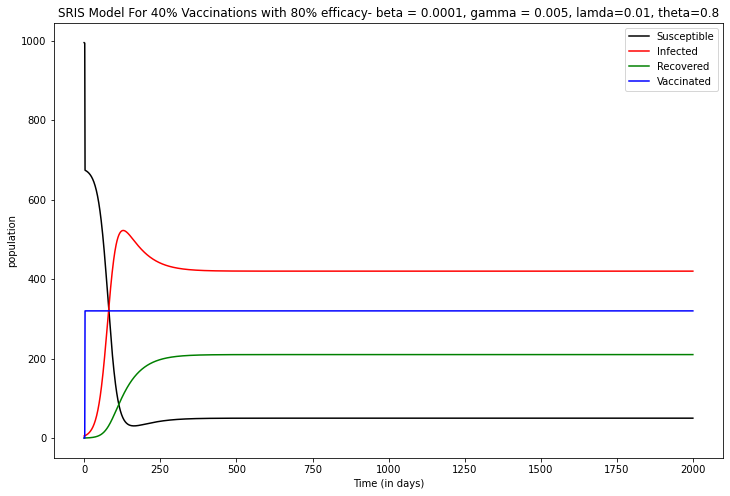

In [22]:
plt.figure(figsize = (12, 8))
plt.plot(np.arange(start_time,end_time,dt),S,color='black',label='Susceptible')
plt.plot(np.arange(start_time,end_time,dt),I,color='red',label='Infected')
plt.plot(np.arange(start_time,end_time,dt),R,color='green',label='Recovered')
plt.plot(np.arange(start_time,end_time,dt),V,color='blue',label='Vaccinated')

plt.legend()
plt.xlabel('Time (in days)')
plt.ylabel('population')
plt.title('SRIS Model For 40% Vaccinations with 80% efficacy- beta = 0.0001, gamma = 0.005, lamda=0.01, theta=0.8')
plt.show()

### Section 2: E
- Introducing some additional connections in the network.
- Taking additional connections as 15%.

In [23]:
start_time = 0
end_time = 2000
dt = 1

def model_s(beta,s,i,lamda,r):
    return lamda*r-beta*s*i

def model_i(beta,s,i,alpha):
    return beta*s*i - alpha*i

def model_r(alpha,i,lamda,r):
    return alpha*i-lamda*r

n = int((end_time - start_time) / dt)
S = np.zeros(n)
I = np.zeros(n)
R = np.zeros(n)
V = np.zeros(n)

beta = 0.0001
alpha = 0.005
lamda=0.01
theta=0.8    # vaccine protection rate

N = S[0] + R[0] + I[0] + V[0]
total = np.zeros(n)
total[0] = N
I[0] = 5
R[0] = 0
S[0] = 995


for i in range(1,3):
    S[i] = S[i-1] + model_s(beta,S[i-1],I[i-1],lamda,R[i-1]) * dt
    I[i] = I[i-1] + model_i(beta,S[i-1],I[i-1],alpha) * dt
    R[i] = R[i-1] + model_r(alpha,I[i-1],lamda,R[i-1]) * dt

V[3] = 400*theta

I[3] = I[2]
R[3] = R[2]
S[3] = 1000-V[3]-I[3]
print('I at 3 :',I[3])
print('R at 3 :',R[3])
print('S at 3 :',S[3])

for i in range(4,len(S)):
    S[i] = S[i-1] + model_s(beta,S[i-1],I[i-1],lamda,R[i-1]) * dt
    I[i] = I[i-1] + model_i(beta,S[i-1],I[i-1],alpha) * dt
    I[i] = I[i]+0.15
    R[i] = R[i-1] + model_r(alpha,I[i-1],lamda,R[i-1]) * dt
    V[i] = V[3]

I at 3 : 5.989378993125
R at 3 : 0.052112500000000006
S at 3 : 674.010621006875


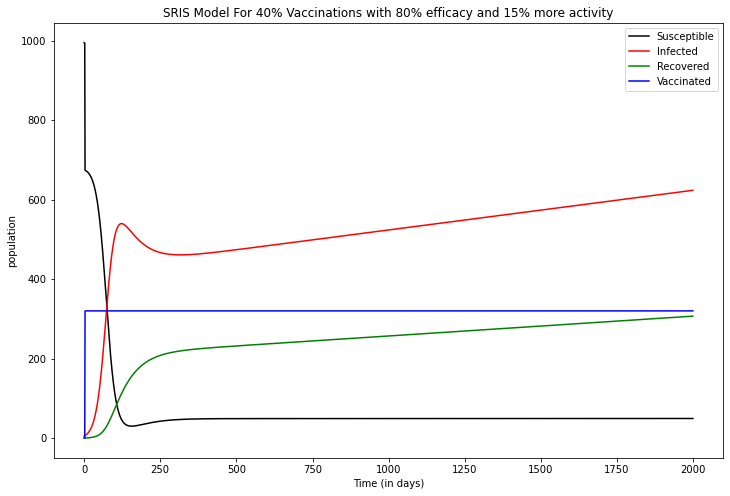

In [24]:
plt.figure(figsize = (12, 8))
plt.plot(np.arange(start_time,end_time,dt),S,color='black',label='Susceptible')
plt.plot(np.arange(start_time,end_time,dt),I,color='red',label='Infected')
plt.plot(np.arange(start_time,end_time,dt),R,color='green',label='Recovered')
plt.plot(np.arange(start_time,end_time,dt),V,color='blue',label='Vaccinated')


plt.legend()
plt.xlabel('Time (in days)')
plt.ylabel('population')
plt.title('SRIS Model For 40% Vaccinations with 80% efficacy and 15% more activity')
plt.show()

- 25% more connections leads to more infection rate than normal.
- More infection rate means more recovery also and this is the reason for the increase in recovered cases as well along with the infected cases.

### Section 2: F
- Basketball season is taken into consideration lets say a basketball league is held for 200 days (300-500 days).
- Because of this social activity in the population will be more (say 25% more activity than normal).

In [25]:
start_time = 0
end_time = 2000
dt = 1

def model_s(beta,s,i,lamda,r):
    return lamda*r-beta*s*i

def model_i(beta,s,i,alpha):
    return beta*s*i - alpha*i

def model_r(alpha,i,lamda,r):
    return alpha*i-lamda*r

n = int((end_time - start_time) / dt)
S = np.zeros(n)
I = np.zeros(n)
R = np.zeros(n)
V = np.zeros(n)

beta = 0.0001
alpha = 0.005
lamda=0.01
theta=0.8    # vaccine protection rate

N = S[0] + R[0] + I[0] + V[0]
total = np.zeros(n)
total[0] = N
I[0] = 5
R[0] = 0
S[0] = 995


for i in range(1,3):
    S[i] = S[i-1] + model_s(beta,S[i-1],I[i-1],lamda,R[i-1]) * dt
    I[i] = I[i-1] + model_i(beta,S[i-1],I[i-1],alpha) * dt
    R[i] = R[i-1] + model_r(alpha,I[i-1],lamda,R[i-1]) * dt

V[3] = 400*theta

I[3] = I[2]
R[3] = R[2]
S[3] = 1000-V[3]-I[3]
# print('I at 3 :',I[3])
# print('R at 3 :',R[3])
# print('S at 3 :',S[3])

for i in range(4,300):
    S[i] = S[i-1] + model_s(beta,S[i-1],I[i-1],lamda,R[i-1]) * dt
    I[i] = I[i-1] + model_i(beta,S[i-1],I[i-1],alpha) * dt
    R[i] = R[i-1] + model_r(alpha,I[i-1],lamda,R[i-1]) * dt
    V[i] = V[3]

for i in range(300,500):
    S[i] = S[i-1] + model_s(beta,S[i-1],I[i-1],lamda,R[i-1]) * dt
    I[i] = I[i-1] + model_i(beta,S[i-1],I[i-1],alpha) * dt
    I[i] = I[i]+0.25
    R[i] = R[i-1] + model_r(alpha,I[i-1],lamda,R[i-1]) * dt
    V[i] = V[3]
    
for i in range(500,len(S)):
    S[i] = S[i-1] + model_s(beta,S[i-1],I[i-1],lamda,R[i-1]) * dt
    I[i] = I[i-1] + model_i(beta,S[i-1],I[i-1],alpha) * dt
    R[i] = R[i-1] + model_r(alpha,I[i-1],lamda,R[i-1]) * dt
    V[i] = V[3]

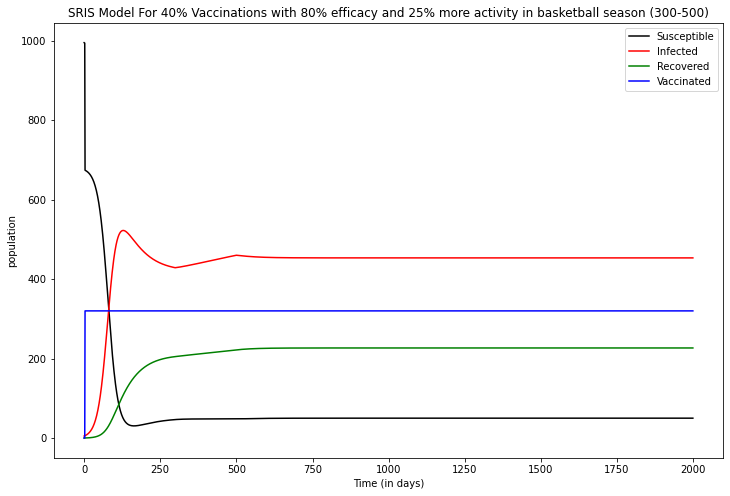

In [26]:
plt.figure(figsize = (12, 8))
plt.plot(np.arange(start_time,end_time,dt),S,color='black',label='Susceptible')
plt.plot(np.arange(start_time,end_time,dt),I,color='red',label='Infected')
plt.plot(np.arange(start_time,end_time,dt),R,color='green',label='Recovered')
plt.plot(np.arange(start_time,end_time,dt),V,color='blue',label='Vaccinated')


plt.legend()
plt.xlabel('Time (in days)')
plt.ylabel('population')
plt.title('SRIS Model For 40% Vaccinations with 80% efficacy and 25% more activity in basketball season (300-500)')
plt.show()

- A spike in infected cases is observed from 300-500 because of more social activity in these days.

### Different Considerations taken in this project
- The vaccine effect taken is permanent i.e., once a vaccine starts its effect at day 3 all the population with the vaccines are immune forever to the disease.
- So this population is not susceptable to the disease and hence can be neglected from the whole population.
- All the curves have very less values as most of the population is considered as vaccinated (these people are not considered as recovered as they are immune and did not get infected from the disease).